#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week.


In [72]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [73]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 1h, 1d, 1wk, 1mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [74]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

# number of days to roll into each linear regression. 260 will be about 1 year
roll_days = 30

In [75]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2015-03-31' # to choose custom date ranges
        #,end = '2019-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2018-12-10,42.400002,19.990000,1641.030029,137.270004,1039.550049,47.209999,83.050003,107.589996,37.965000,163.070007,65.489998,63.380001,73.029999,36.430000,1
2018-12-11,42.157501,19.980000,1643.239990,136.789993,1051.750000,47.380001,85.150002,108.589996,37.047501,163.610001,65.919998,61.779999,73.351997,36.700001,2
2018-12-12,42.275002,20.480000,1663.540039,140.089996,1063.680054,47.830002,89.059998,109.080002,37.224998,165.050003,66.129997,63.650002,73.320000,37.380001,3
2018-12-13,42.737499,19.860001,1658.380005,141.139999,1061.900024,48.290001,89.559998,109.449997,37.222500,165.100006,66.910004,62.900002,75.358002,37.330002,4
2018-12-14,41.369999,19.900000,1591.910034,137.039993,1042.099976,47.860001,90.580002,106.029999,36.612499,161.080002,65.339996,62.139999,73.141998,36.529999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,164.770004,149.110001,3443.719971,251.500000,2832.360107,48.599998,456.890015,330.079987,314.350006,387.119995,108.660004,194.500000,1095.000000,120.629997,751
2021-12-02,163.759995,150.679993,3437.360107,261.200012,2875.530029,49.500000,481.589996,329.489990,321.260010,389.910004,111.419998,192.149994,1084.599976,121.699997,752
2021-12-03,161.839996,144.009995,3389.790039,258.320007,2850.409912,49.250000,450.160004,323.010010,306.929993,383.130005,111.239998,181.309998,1014.969971,119.330002,753


In [76]:
### in progress
# setting a rolling 260 days for each observed stock

df2 = df

for j in lista:
    df2[str(j) + ' roll'] = df2[str(j)].rolling(roll_days).mean()

df2
#df2.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,GOOG roll,INTC roll,MDB roll,MSFT roll,NVDA roll,QQQ roll,SBUX roll,SQ roll,TSLA roll,TSM roll
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-10,42.400002,19.990000,1641.030029,137.270004,1039.550049,47.209999,83.050003,107.589996,37.965000,163.070007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-11,42.157501,19.980000,1643.239990,136.789993,1051.750000,47.380001,85.150002,108.589996,37.047501,163.610001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-12,42.275002,20.480000,1663.540039,140.089996,1063.680054,47.830002,89.059998,109.080002,37.224998,165.050003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-13,42.737499,19.860001,1658.380005,141.139999,1061.900024,48.290001,89.559998,109.449997,37.222500,165.100006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-14,41.369999,19.900000,1591.910034,137.039993,1042.099976,47.860001,90.580002,106.029999,36.612499,161.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,164.770004,149.110001,3443.719971,251.500000,2832.360107,48.599998,456.890015,330.079987,314.350006,387.119995,...,2920.529012,50.150000,529.541334,330.269332,286.652333,391.038667,112.429334,236.059667,1085.686001,117.895667
2021-12-02,163.759995,150.679993,3437.360107,261.200012,2875.530029,49.500000,481.589996,329.489990,321.260010,389.910004,...,2921.436678,49.954333,528.777667,331.005331,289.993333,391.536333,112.348001,233.953000,1092.979333,118.099334
2021-12-03,161.839996,144.009995,3389.790039,258.320007,2850.409912,49.250000,450.160004,323.010010,306.929993,383.130005,...,2921.263338,49.729333,526.802001,331.413665,292.660333,391.731667,112.241334,231.160667,1097.011666,118.200667


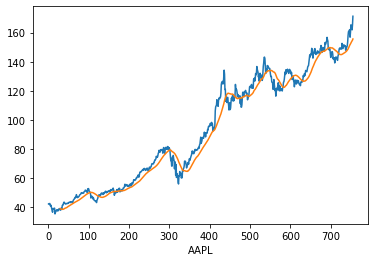

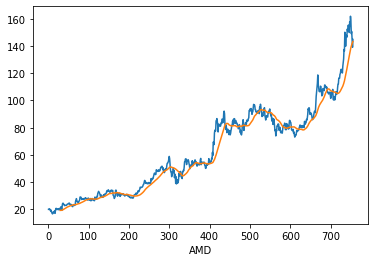

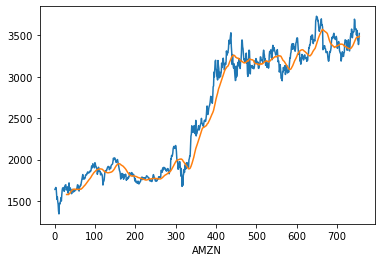

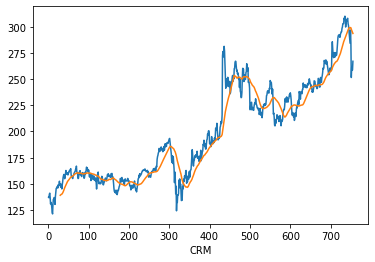

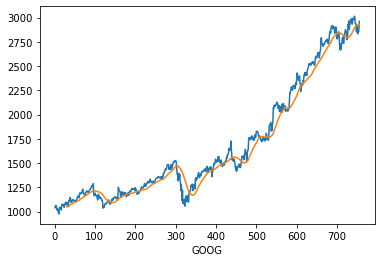

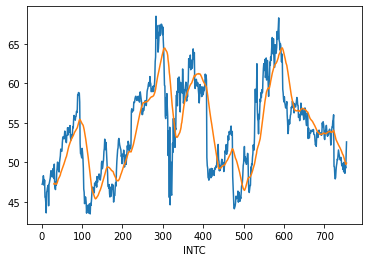

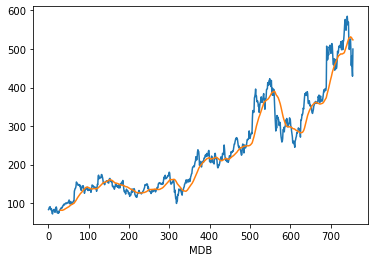

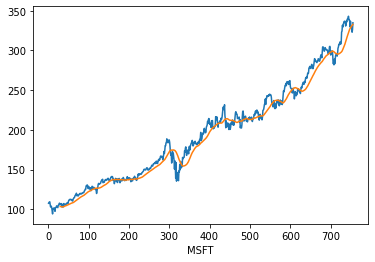

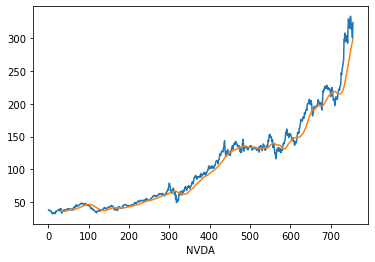

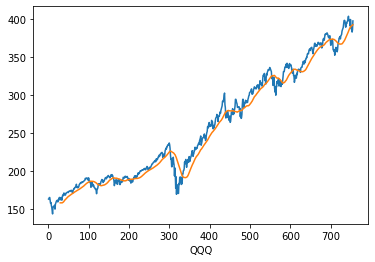

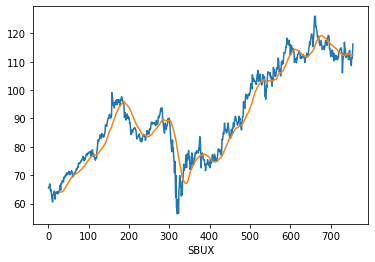

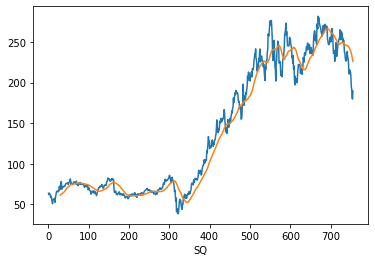

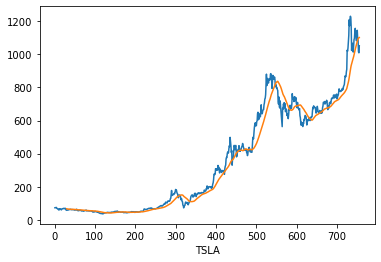

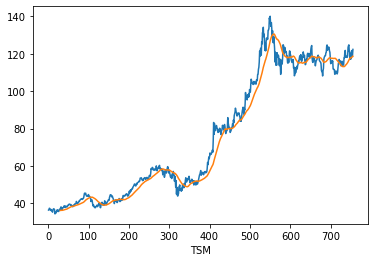

In [77]:
### in progress
# Not what I thought. I thought it would match the rolling linear predictions.
# This is a single point representing 260 days while the linear predition is a line representing 260 days
# I would have to do something weird like set a multiplier based on the gains/losses made in the last year
# but that sounds too iffy and made up

for j in lista:
    x = df2['Index']
    y = df2[str(j)]
    plt.plot(x, y)

    x = df2['Index']
    y = df2[str(j) + ' roll']
    plt.plot(x, y)

    plt.xlabel(j)
    plt.show()

In [78]:
df3['Dates'] = df3.index
df3

,Intercept,Index,TSM,Pred,Dates
Date,,,,,
2018-12-10,NaN,NaN,36.430000,NaN,2018-12-10
2018-12-11,NaN,NaN,36.700001,NaN,2018-12-11
2018-12-12,NaN,NaN,37.380001,NaN,2018-12-12
2018-12-13,NaN,NaN,37.330002,NaN,2018-12-13
2018-12-14,NaN,NaN,36.529999,NaN,2018-12-14
...,...,...,...,...,...
2021-12-01,1757.733063,-2784.573441,120.629997,-81779.470180,2021-12-01
2021-12-02,2193.424235,-4128.407344,121.699997,-121658.796079,2021-12-02
2021-12-03,2928.391250,-6296.231305,119.330002,-185958.547887,2021-12-03


In [79]:
### in progress
# now that I know I don't want a rolling average, find out how to more simply do a rolling linear regression
# goal is to avoid having to make 50 dataframes

# https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingOLS.html

# issue - I need every iteration to have a fresh 1-260 as opposed to 1-260, then 2-261, etc
    # I can't seem to read from a stagnant list to do this

mod = RollingOLS.from_formula("TSM ~ Index", data=df3, window=roll_days)
rres = mod.fit()
df3 = rres.params
df3['TSM'] = df['TSM']
df3['Pred'] = df3['Intercept']+(df3['Index']*roll_days)
df3

#df3.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/rolling.py:248: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)


,Intercept,Index,TSM,Pred
Date,,,,
2018-12-10,NaN,NaN,36.430000,NaN
2018-12-11,NaN,NaN,36.700001,NaN
2018-12-12,NaN,NaN,37.380001,NaN
2018-12-13,NaN,NaN,37.330002,NaN
2018-12-14,NaN,NaN,36.529999,NaN
...,...,...,...,...
2021-12-01,-5272.228965,-0.059626,120.629997,-5274.017739
2021-12-02,-4319.889345,-0.049970,121.699997,-4321.388455
2021-12-03,-3363.768420,-0.040231,119.330002,-3364.975336


In [80]:
# function to make a useful time structure as independent variable
def myTime(date_time_str):
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    return(time.mktime(date_time_obj.timetuple()))

In [81]:
#df3['Time'] = [myTime(obs) for obs in df3['Dates']]

In [82]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-roll_days ### is this correct?
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10
        y -= 10

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2021-10-26  149.320007  122.930000  3376.070068  295.109985  2793.439941   
2021-10-27  148.850006  122.279999  3392.489990  295.149994  2928.550049   
2021-10-28  152.570007  121.160004  3446.570068  298.380005  2922.580078   
2021-10-29  149.800003  120.230003  3372.429932  299.690002  2965.409912   
2021-11-01  148.960007  125.230003  3318.110107  302.760010  2875.479980   
2021-11-02  150.020004  127.629997  3312.750000  302.950012  2917.260010   
2021-11-03  151.490005  130.529999  3384.000000  302.890015  2935.800049   
2021-11-04  150.960007  137.500000  3477.000000  308.040009  2973.659912   
2021-11-05  151.279999  136.339996  3518.989990  307.250000  2984.820068   
2021-11-08  150.440002  150.160004  3488.979980  309.959991  2987.030029   
2021-11-09  150.809998  148.919998  3576.229980  309.709991  2984.969971   
2021-11-10  

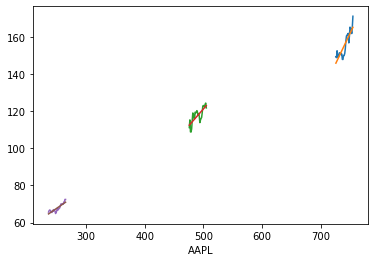

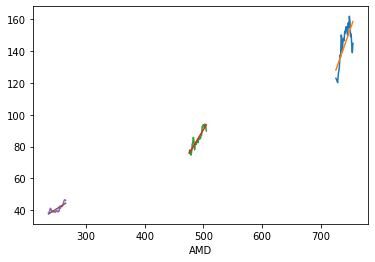

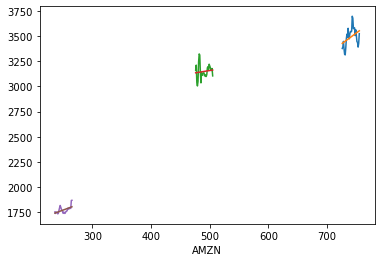

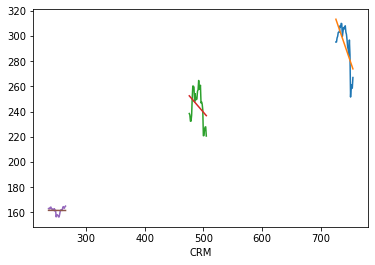

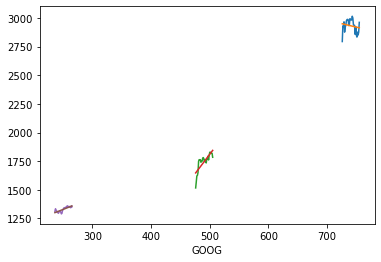

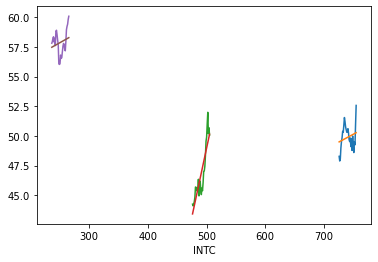

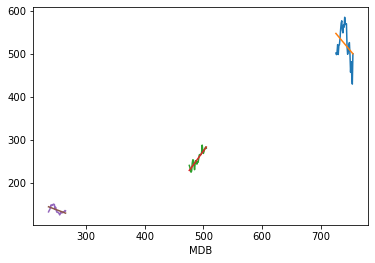

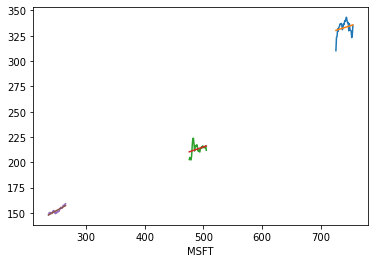

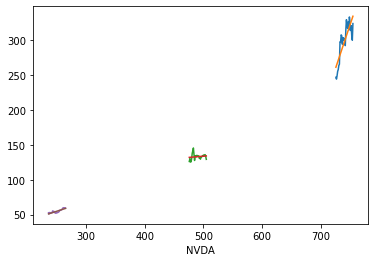

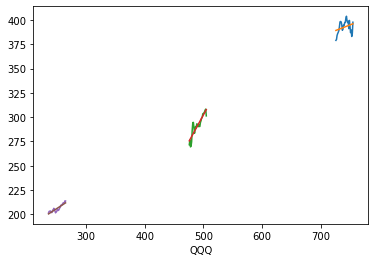

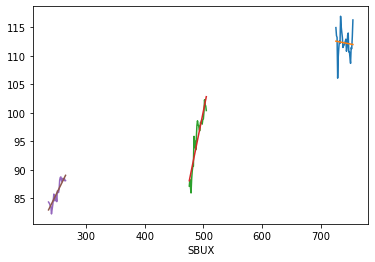

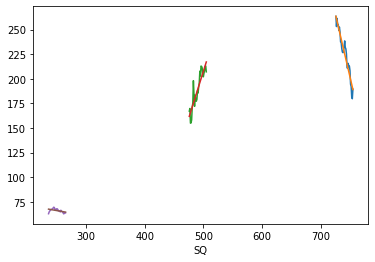

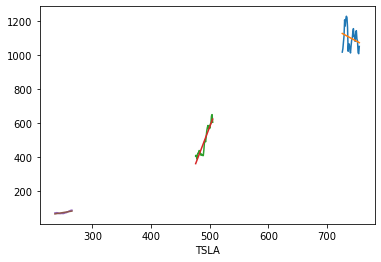

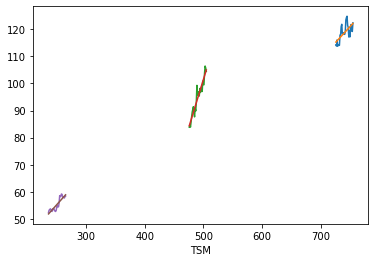

In [83]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

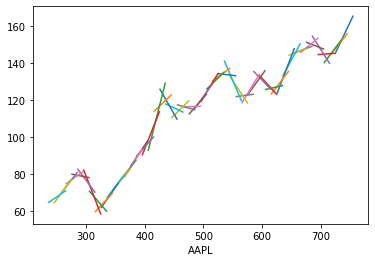

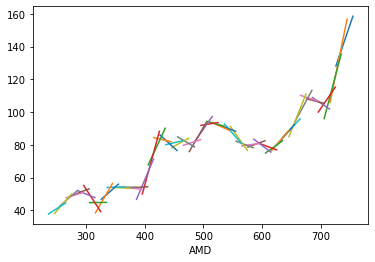

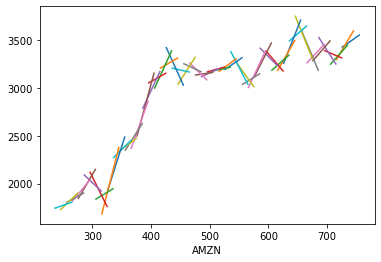

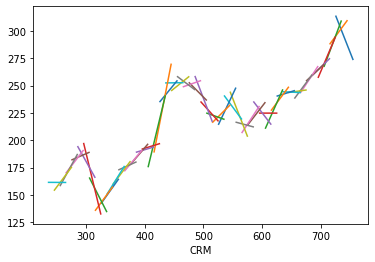

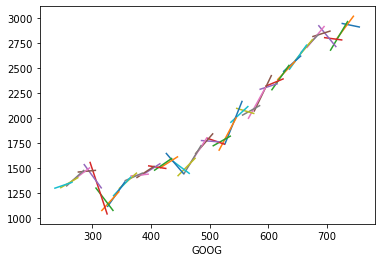

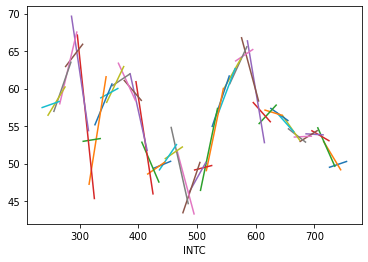

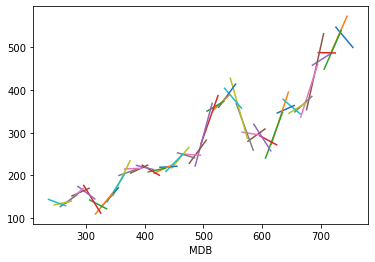

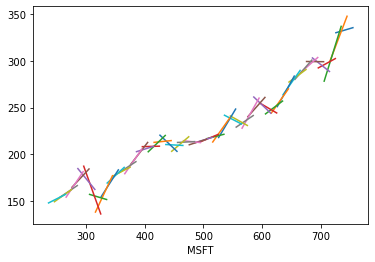

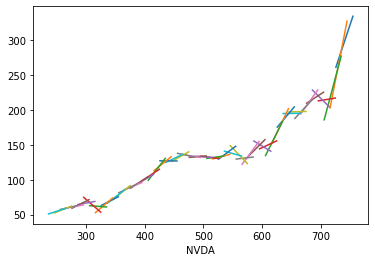

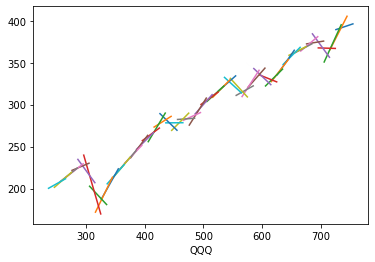

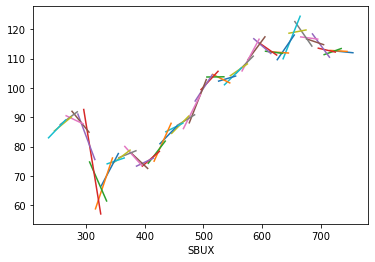

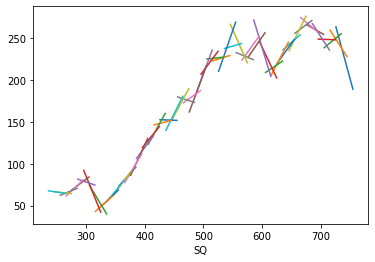

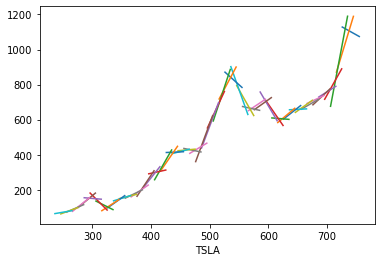

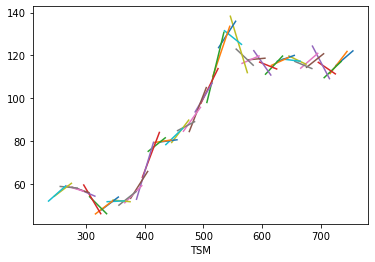

In [84]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [85]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(roll_days)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

<ipython-input-85-6f7aa18876ec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred'] = nlist
<ipython-input-85-6f7aa18876ec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-26,149.320007,122.930000,3376.070068,295.109985,2793.439941,48.279999,501.679993,310.109985,247.169998,379.119995,...,389.615063,1.027683,112.526277,0.979171,260.918624,0.990617,1126.404469,1.106021,115.466677,1.011269
2021-10-27,148.850006,122.279999,3392.489990,295.149994,2928.550049,47.889999,497.959991,323.170013,244.509995,380.000000,...,389.850861,1.025923,112.506059,0.991155,258.354257,1.021082,1124.538879,1.083517,115.702750,1.017167
2021-10-28,152.570007,121.160004,3446.570068,298.380005,2922.580078,48.080002,504.619995,324.350006,249.410004,384.220001,...,390.086659,1.015269,112.485841,0.993691,255.789889,0.978800,1122.673288,1.042369,115.938824,0.999386
2021-10-29,149.800003,120.230003,3372.429932,299.690002,2965.409912,49.000000,521.289978,331.619995,255.669998,386.109985,...,390.322457,1.010910,112.465623,1.060296,253.225522,0.994992,1120.807698,1.006111,116.174897,1.021767
2021-11-01,148.960007,125.230003,3318.110107,302.760010,2875.479980,49.549999,498.269989,329.369995,258.269989,387.429993,...,390.558254,1.008074,112.445405,1.024093,250.661155,0.982831,1118.942108,0.925824,116.410970,1.020075
2021-11-02,150.020004,127.629997,3312.750000,302.950012,2917.260010,49.860001,518.359985,333.130005,264.010010,389.049988,...,390.794052,1.004483,112.425187,1.008750,248.096788,0.996333,1117.076518,0.953137,116.647044,1.022233
2021-11-03,151.490005,130.529999,3384.000000,302.890015,2935.800049,50.389999,521.200012,334.000000,265.980011,393.179993,...,391.029850,0.994531,112.404969,0.998179,245.532421,0.972483,1115.210927,0.918731,116.883117,1.025201
2021-11-04,150.960007,137.500000,3477.000000,308.040009,2973.659912,50.310001,535.080017,336.440002,298.010010,398.220001,...,391.265648,0.982536,112.384751,1.002004,242.968054,0.981848,1113.345337,0.905225,117.119190,0.994305
2021-11-05,151.279999,136.339996,3518.989990,307.250000,2984.820068,50.919998,555.580017,336.059998,297.519989,398.600006,...,391.501446,0.982191,112.364533,0.961120,240.403686,1.012738,1111.479747,0.909491,117.355264,0.996225


In [86]:
# pull the last 'close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    zlist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))
        zlist.append(round(dataframes['data' + str(e)][str(j) + ' pred'].iloc[k-1],2))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred'] = pd.DataFrame(zlist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,SBUX pred/close,SQ,SQ pred,SQ pred/close,TSLA,TSLA pred,TSLA pred/close,TSM,TSM pred,TSM pred/close
40,41,145.86,150.91,1.0346,106.19,96.23,0.9062,3327.5901,3650.89,1.0972,...,1.0285,247.26,254.65,1.0299,687.2000,661.58,0.9627,116.64,117.21,1.0049
41,42,149.10,147.98,0.9925,110.55,111.99,1.0130,3293.9700,3290.93,0.9991,...,1.0256,267.88,277.61,1.0363,717.1700,712.95,0.9941,115.50,115.71,1.0019
42,43,148.60,149.06,1.0031,111.40,113.87,1.0221,3349.6299,3170.57,0.9465,...,0.9898,268.01,271.67,1.0137,711.9200,716.93,1.0070,118.49,113.72,0.9597
43,44,149.55,153.63,1.0273,104.80,106.66,1.0177,3457.1699,3461.16,1.0012,...,0.9782,246.68,256.66,1.0404,743.0000,739.40,0.9951,123.62,121.16,0.9801
44,45,145.37,147.36,1.0137,108.16,105.30,0.9736,3405.8000,3497.25,1.0269,...,1.0085,258.11,254.11,0.9845,791.3600,778.32,0.9835,116.15,120.95,1.0413
45,46,142.81,139.31,0.9755,104.68,101.66,0.9712,3246.3000,3241.23,0.9984,...,0.9932,232.33,234.77,1.0105,791.9400,792.28,1.0004,110.26,108.58,0.9848
46,47,148.64,145.25,0.9772,122.36,115.76,0.9461,3320.3701,3311.06,0.9972,...,0.9777,262.00,248.12,0.9470,1024.8600,895.69,0.8740,113.64,111.14,0.9780
47,48,150.44,152.68,1.0149,150.16,136.84,0.9113,3488.9800,3454.13,0.9900,...,0.9853,236.77,255.82,1.0805,1162.9399,1207.51,1.0383,120.91,117.39,0.9709
48,49,161.02,156.07,0.9692,152.52,158.47,1.0390,3572.5701,3604.98,1.0091,...,1.0085,211.31,226.76,1.0731,1156.8700,1200.17,1.0374,124.75,122.18,0.9794
49,50,171.18,165.87,0.9690,144.85,159.62,1.1019,3523.2900,3556.06,1.0093,...,0.9628,189.51,186.55,0.9844,1051.7500,1072.30,1.0195,122.32,122.31,0.9999


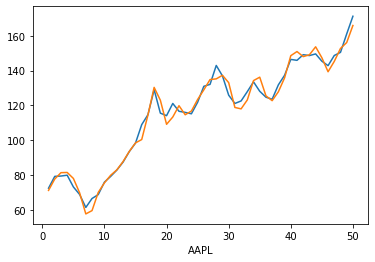

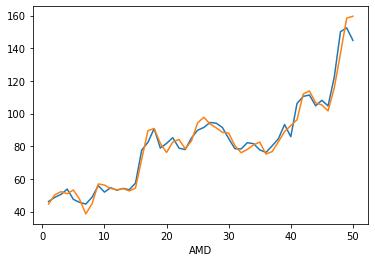

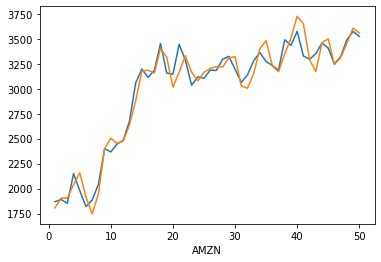

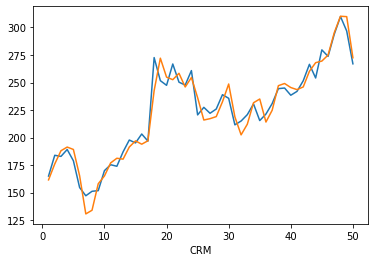

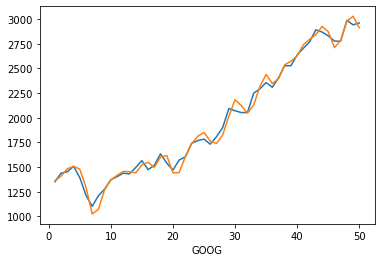

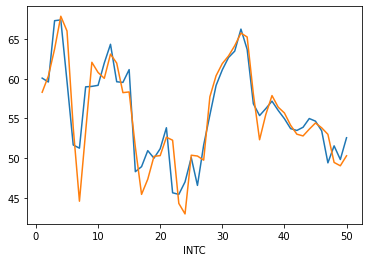

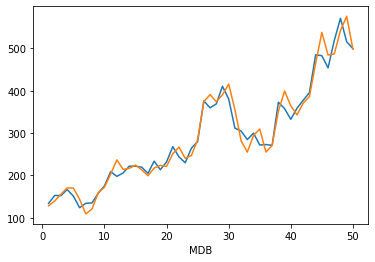

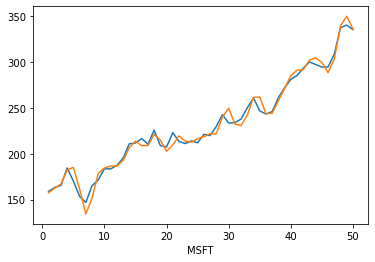

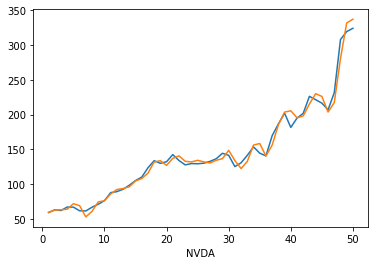

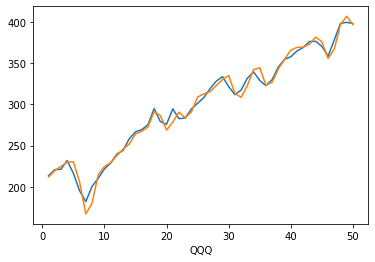

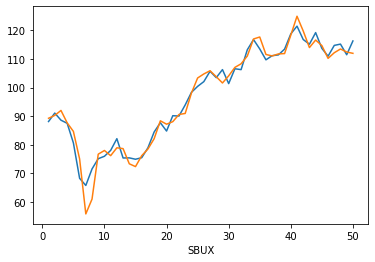

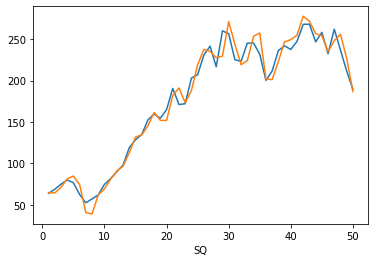

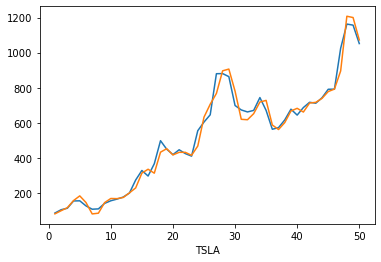

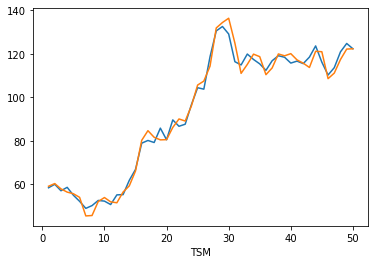

In [87]:
# plot for each stock the close price and the prediction price
# close (blue) below prediction (orange) = stock is underperforming

for i in lista:
    x = df['Index']
    y = df[str(i)]
    plt.plot(x, y)

    x = df['Index']
    y = df[str(i) + ' pred']
    plt.plot(x, y)

    plt.xlabel(i)
    plt.show()

#### At this point, the foundation is set and strategies can be created and tested.

In [88]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG >1,INTC >1,MDB >1,MSFT >1,NVDA >1,QQQ >1,SBUX >1,SQ >1,TSLA >1,TSM >1
40,41,145.86,150.91,1.0346,106.19,96.23,0.9062,3327.5901,3650.89,1.0972,...,1,1,0,1,1,1,1,1,0,1
41,42,149.10,147.98,0.9925,110.55,111.99,1.0130,3293.9700,3290.93,0.9991,...,1,0,0,0,0,1,1,1,0,1
42,43,148.60,149.06,1.0031,111.40,113.87,1.0221,3349.6299,3170.57,0.9465,...,0,0,0,1,0,0,0,1,1,0
43,44,149.55,153.63,1.0273,104.80,106.66,1.0177,3457.1699,3461.16,1.0012,...,1,0,0,1,1,1,0,1,0,0
44,45,145.37,147.36,1.0137,108.16,105.30,0.9736,3405.8000,3497.25,1.0269,...,1,0,1,1,1,1,1,0,0,1
45,46,142.81,139.31,0.9755,104.68,101.66,0.9712,3246.3000,3241.23,0.9984,...,0,1,1,0,0,0,0,1,1,0
46,47,148.64,145.25,0.9772,122.36,115.76,0.9461,3320.3701,3311.06,0.9972,...,1,1,0,0,0,0,0,0,0,0
47,48,150.44,152.68,1.0149,150.16,136.84,0.9113,3488.9800,3454.13,0.9900,...,0,0,0,1,0,0,0,1,1,0
48,49,161.02,156.07,0.9692,152.52,158.47,1.0390,3572.5701,3604.98,1.0091,...,1,0,1,1,1,1,1,1,1,0
49,50,171.18,165.87,0.9690,144.85,159.62,1.1019,3523.2900,3556.06,1.0093,...,0,0,0,1,1,0,0,0,1,0


In [89]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG pred/close2,INTC pred/close2,MDB pred/close2,MSFT pred/close2,NVDA pred/close2,QQQ pred/close2,SBUX pred/close2,SQ pred/close2,TSLA pred/close2,TSM pred/close2
40,41,145.86,150.91,1.0346,106.19,96.23,0.9062,3327.5901,3650.89,1.0972,...,1.0264,1.0157,0.9139,1.0414,1.0048,1.0243,1.0578,1.0607,0.9268,1.0098
41,42,149.10,147.98,0.9925,110.55,111.99,1.0130,3293.9700,3290.93,0.9991,...,1.0191,0.9823,0.9649,0.9888,0.9629,1.0032,1.0519,1.0739,0.9882,1.0038
42,43,148.60,149.06,1.0031,111.40,113.87,1.0221,3349.6299,3170.57,0.9465,...,0.9665,0.9600,0.9539,1.0126,0.9054,0.9825,0.9797,1.0276,1.0140,0.9210
43,44,149.55,153.63,1.0273,104.80,106.66,1.0177,3457.1699,3461.16,1.0012,...,1.0392,0.9518,0.9181,1.0492,1.0789,1.0278,0.9569,1.0824,0.9902,0.9606
44,45,145.37,147.36,1.0137,108.16,105.30,0.9736,3405.8000,3497.25,1.0269,...,1.0312,0.9916,1.2406,1.0343,1.0914,1.0296,1.0171,0.9692,0.9673,1.0843
45,46,142.81,139.31,0.9755,104.68,101.66,0.9712,3246.3000,3241.23,0.9984,...,0.9528,1.0145,1.1378,0.9594,0.9690,0.9837,0.9864,1.0211,1.0008,0.9698
46,47,148.64,145.25,0.9772,122.36,115.76,0.9461,3320.3701,3311.06,0.9972,...,1.0054,1.1505,0.8812,0.9659,0.8810,0.9426,0.9559,0.8968,0.7639,0.9565
47,48,150.44,152.68,1.0149,150.16,136.84,0.9113,3488.9800,3454.13,0.9900,...,0.9936,0.9206,0.9025,1.0120,0.8306,0.9930,0.9708,1.1675,1.0781,0.9426
48,49,161.02,156.07,0.9692,152.52,158.47,1.0390,3572.5701,3604.98,1.0091,...,1.0601,0.9685,1.2472,1.0574,1.0795,1.0373,1.0171,1.1515,1.0762,0.9592
49,50,171.18,165.87,0.9690,144.85,159.62,1.1019,3523.2900,3556.06,1.0093,...,0.9675,0.9155,0.9940,1.0050,1.0820,0.9930,0.9270,0.9690,1.0394,0.9998


In [90]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,TSM baseline,TSM baseline_stk,TSM opt1,TSM opt1_stk,TSM opt2,TSM opt2_stk,TSM opt3,TSM opt3_stk,TSM opt4,TSM opt4_stk
40,41,145.86,150.91,1.0346,106.19,96.23,0.9062,3327.5901,3650.89,1.0972,...,10,0.0857,10.049,0.0862,10.098,0.0866,0,0.0,9.9512,0.0853
41,42,149.10,147.98,0.9925,110.55,111.99,1.0130,3293.9700,3290.93,0.9991,...,10,0.0866,10.019,0.0867,10.038,0.0869,0,0.0,9.9810,0.0864
42,43,148.60,149.06,1.0031,111.40,113.87,1.0221,3349.6299,3170.57,0.9465,...,10,0.0844,9.597,0.0810,9.210,0.0777,0,0.0,10.4199,0.0879
43,44,149.55,153.63,1.0273,104.80,106.66,1.0177,3457.1699,3461.16,1.0012,...,10,0.0809,9.801,0.0793,9.606,0.0777,0,0.0,10.2030,0.0825
44,45,145.37,147.36,1.0137,108.16,105.30,0.9736,3405.8000,3497.25,1.0269,...,10,0.0861,10.413,0.0897,10.843,0.0934,0,0.0,9.6034,0.0827
45,46,142.81,139.31,0.9755,104.68,101.66,0.9712,3246.3000,3241.23,0.9984,...,10,0.0907,9.848,0.0893,9.698,0.0880,0,0.0,10.1543,0.0921
46,47,148.64,145.25,0.9772,122.36,115.76,0.9461,3320.3701,3311.06,0.9972,...,10,0.0880,9.780,0.0861,9.565,0.0842,0,0.0,10.2249,0.0900
47,48,150.44,152.68,1.0149,150.16,136.84,0.9113,3488.9800,3454.13,0.9900,...,10,0.0827,9.709,0.0803,9.426,0.0780,0,0.0,10.2997,0.0852
48,49,161.02,156.07,0.9692,152.52,158.47,1.0390,3572.5701,3604.98,1.0091,...,10,0.0802,9.794,0.0785,9.592,0.0769,0,0.0,10.2103,0.0818
49,50,171.18,165.87,0.9690,144.85,159.62,1.1019,3523.2900,3556.06,1.0093,...,10,0.0818,9.999,0.0817,9.998,0.0817,0,0.0,0.0000,0.0000


In [91]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit   diff  %_diff
0  AAPL baseline     500.00       4.6230  291.37   0.00    0.00
1       AAPL op1     498.16       4.6022  289.65  -1.72   -0.59
2       AAPL op2     496.91       4.5878  288.43  -2.94   -1.02
3       AAPL op3     500.00       4.7991  321.51  30.14    9.37
4       AAPL op4     492.14       4.5898  293.55   2.18    0.74

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       6.7771  481.66   0.00    0.00
1       AMD op1     498.93       6.7618  480.52  -1.14   -0.24
2       AMD op2     499.32       6.7674  480.94  -0.72 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [92]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in,CRM bought_in,GOOG bought_in,INTC bought_in,MDB bought_in,MSFT bought_in,NVDA bought_in,QQQ bought_in,SBUX bought_in,SQ bought_in,TSLA bought_in,TSM bought_in
0,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
1,498.16,498.93,490.38,498.66,499.88,498.53,493.75,489.99,499.91,499.28,498.69,497.77,494.29,499.29
2,496.91,499.32,491.47,498.40,490.70,498.27,488.20,490.48,490.42,498.97,498.19,498.80,492.43,499.18
3,500.00,460.00,460.00,500.00,500.00,500.00,440.00,480.00,460.00,480.00,500.00,500.00,500.00,500.00
4,492.14,493.47,490.33,492.65,490.58,492.24,499.34,490.53,491.91,491.11,491.79,495.89,490.54,491.32


In [93]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit,CRM profit,GOOG profit,INTC profit,MDB profit,MSFT profit,NVDA profit,QQQ profit,SBUX profit,SQ profit,TSLA profit,TSM profit
0,291.37,481.66,114.11,118.59,319.23,-23.42,509.59,258.93,887.78,195.69,116.99,195.44,1212.77,231.96
1,289.65,480.52,115.62,117.58,316.10,-23.21,510.43,258.49,886.90,194.85,115.88,184.16,1185.67,230.18
2,288.43,480.94,115.94,117.04,316.70,-22.99,515.99,258.23,889.32,194.05,115.22,177.51,1174.38,228.77
3,321.51,445.67,111.48,120.94,304.73,-27.06,476.37,228.29,765.35,184.61,123.57,159.48,1216.04,263.33
4,293.55,484.46,114.97,119.91,320.66,-23.61,512.69,259.73,891.78,196.82,118.58,212.79,1260.10,234.12


In [94]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff,CRM diff,GOOG diff,INTC diff,MDB diff,MSFT diff,NVDA diff,QQQ diff,SBUX diff,SQ diff,TSLA diff,TSM diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-1.72,-1.14,1.51,-1.01,-3.13,0.21,0.84,-0.44,-0.88,-0.84,-1.11,-11.28,-27.10,-1.78
2,-2.94,-0.72,1.83,-1.55,-2.53,0.43,6.40,-0.70,1.54,-1.64,-1.77,-17.93,-38.39,-3.19
3,30.14,-35.99,-2.63,2.35,-14.50,-3.64,-33.22,-30.64,-122.43,-11.08,6.58,-35.96,3.27,31.37
4,2.18,2.80,0.86,1.32,1.43,-0.19,3.10,0.80,4.00,1.13,1.59,17.35,47.33,2.16


In [95]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  December 07, 2021 17:34:34

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

-47.87 opt1 profit/loss over baseline. 4862.82 core profit on 6957.51 investment. -0.97 percent above/below baseline profit.
-61.16 opt2 profit/loss over baseline. 4849.53 core profit on 6931.74 investment. -1.25 percent above/below baseline profit.
-216.38 opt3 profit/loss over baseline. 4694.31 core profit on 6780.0 investment. -4.41 percent above/below baseline profit.
85.86 opt4 profit/loss over baseline. 4996.55 core profit on 6893.84 investment. 1.75 percent above/below baseline profit.


In [96]:
print("Using one of the strategies, today's buy in values are listed.")

now = pd.DataFrame()
opts = ['opt1', 'opt2', 'opt3', 'opt4']
now['method'] = opts

for j in lista:
    nlist = []
    for i in range(1, len(opts)+1):
        if i == 1: 
            x = biwkly_contrib * df[str(j) + ' pred/close'].iloc[49]
        elif i == 2:
            x = biwkly_contrib * df[str(j) + ' pred/close2'].iloc[49]
        elif i == 3:
            x = biwkly_contrib * 2 * df[str(j) + ' >1'].iloc[49]
        elif i == 4: 
            x = biwkly_contrib / df[str(j) + ' pred/close'].iloc[49]
        else: -1
        nlist.append(round(x,2))
    now[str(j)] = nlist

now

Using one of the strategies, today's buy in values are listed.


,method,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
0,opt1,9.69,11.02,10.09,10.21,9.84,9.57,9.97,10.02,10.40,9.96,9.63,9.84,10.20,10.0
1,opt2,9.39,12.14,10.19,10.42,9.68,9.15,9.94,10.05,10.82,9.93,9.27,9.69,10.39,10.0
2,opt3,0.00,20.00,20.00,20.00,0.00,0.00,0.00,20.00,20.00,0.00,0.00,0.00,20.00,0.0
3,opt4,10.32,9.08,9.91,9.80,10.17,10.45,10.03,9.98,9.61,10.04,10.39,10.16,9.81,10.0


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.